In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import joblib
from sklearn import tree

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/wildcard-mask/web-classification/main/Webpages_Classification_test_data_top_1k.csv", low_memory=False)
df = pd.read_csv("https://raw.githubusercontent.com/wind-bird/web-classification/main/10k_good_bad.csv", low_memory=False)
model = DecisionTreeClassifier()

In [ ]:
df

,url,url_len,tld,https,label
0,http://www.treecityawards.com,29,com,yes,good
1,http://www.nematodes.org/fgn/pnb/brugmal.html,45,org,yes,good
2,http://www.kariwanz.com/,24,com,no,bad
3,http://groups.yahoo.com/group/satva/,36,com,yes,good
4,http://www.systemmanagers.com/,30,com,yes,good
...,...,...,...,...,...
9879,http://www.realsexsites.com/pnp/4/girlsreadyfo...,66,com,no,bad
9880,http://www.tropicheat.com/,26,com,no,bad
9881,http://www.kinkykara.com/suckingwhores/,39,com,yes,bad
9882,http://members.cox.net/skintightfx/,35,net,yes,good


In [ ]:
#Replace good/bad & yes/no with respective numerical indicators

# df['label'] = df['label'].replace('good', 1)
# df['label'] = df['label'].replace('bad', 0)
# df['https'] = df['https'].replace('yes', 1)
# df['https'] = df['https'].replace('no', 0)

# test_set['label'] = test_set['label'].replace('good', 1)
# test_set['label'] = test_set['label'].replace('bad', 0)
# test_set['https'] = test_set['https'].replace('yes', 1)
# test_set['https'] = test_set['https'].replace('no', 0)

# df = df.astype({'https': 'int16', "label": 'int16', "url_len": 'int16'})
# train_set = train_set.astype({'https': 'int8', "label": 'int8', "url_len": 'int8'})


In [ ]:
# train_data = train_set.drop(columns=['label'])
# train_answers = train_set.drop(columns=["url", "url_len", "tld", "https"])

# test_data = test_set.drop(columns=['label'])
# test_answers = test_set.drop(columns=["url", "url_len", "tld", "https"])

X = df.drop(columns=["label"]) # input data subset
y = df["label"] # output data subset (target)
type(X)

pandas.core.frame.DataFrame

In [ ]:
# Convert to DataFrames
# train_data = pd.DataFrame(train_data)
# train_answers = pd.DataFrame(train_answers)
# test_data = pd.DataFrame(test_data)
# test_answers = pd.DataFrame(test_answers)
# train_data.head()


In [ ]:
#Encode the Object Columns

# features = ["url", "url_len", "tld", "https", "label"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot", one_hot, features)], remainder="passthrough")
# transform_Train_Data = transformer.fit_transform(train_data.to_pandas())
# transform_Train_Answers = transformer.fit_transform(train_answers.to_pandas())
# transform_Test_Data = transformer.fit_transform(test_data.to_pandas())
# transform_Test_Answers = transformer.fit_transform(test_answers.to_pandas())

# features = ["url", "url_len", "tld", "https"]
# one_hot = OneHotEncoder(sparse_output=False)
# transformer = ColumnTransformer([("one_hot", one_hot, features)], remainder="passthrough")
# transformed_X = transformer.fit_transform(X)


# transform_Train_Data = transformer.fit_transform(train_data)
# transform_Test_Data = transformer.fit_transform(test_data)

# transformer = ColumnTransformer([("one_hot", one_hot, ["label"])], remainder="passthrough")
# transform_Train_Answers = transformer.fit_transform(train_answers)
# transform_Test_Answers = transformer.fit_transform(test_answers)


In [ ]:
#Set training & testing data and answers


# train_data = transform_Train.getcol(360256)
# train_answers = transform_Train.getcol(360256)


# test_data = transform_Test.getcol(360256)
# test_answers = transform_Test.getcol(360256)

# see_train_data = transform_Train.getrow(1).todense()
# see_train_data = see_train_data.tocsr()
# see_train_data\
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train.url)
X_test_counts = vectorizer.transform(X_test.url)

In [ ]:
model.fit(X_train_counts,y_train)

DecisionTreeClassifier()

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(100000)


1000


In [ ]:
joblib.dump(model, "model.joblib")

['model.joblib']

[Text(0.9966038207256559, 0.9998100303951368, 'x[7826] <= 0.5\ngini = 0.5\nsamples = 7907\nvalue = [4030.0, 3877.0]'),
 Text(0.9939370360537918, 0.9994300911854104, 'x[3625] <= 0.5\ngini = 0.497\nsamples = 7291\nvalue = [3925.0, 3366.0]'),
 Text(0.9952704283897238, 0.9996200607902737, 'True  '),
 Text(0.9904269532162634, 0.9990501519756839, 'x[4391] <= 0.5\ngini = 0.494\nsamples = 7060\nvalue = [3922.0, 3138.0]'),
 Text(0.9863243659511263, 0.9986702127659575, 'x[5517] <= 0.5\ngini = 0.497\nsamples = 6755\nvalue = [3622, 3133]'),
 Text(0.9813558799693569, 0.998290273556231, 'x[9309] <= 0.5\ngini = 0.5\nsamples = 6304\nvalue = [3243, 3061]'),
 Text(0.9809911826681169, 0.9979103343465046, 'x[3155] <= 0.5\ngini = 0.5\nsamples = 6180\nvalue = [3119, 3061]'),
 Text(0.9776643492895526, 0.9975303951367781, 'x[5879] <= 0.5\ngini = 0.5\nsamples = 5946\nvalue = [2918, 3028]'),
 Text(0.9742929582435836, 0.9971504559270516, 'x[5341] <= 0.5\ngini = 0.5\nsamples = 5859\nvalue = [2839, 3020]'),
 Text(

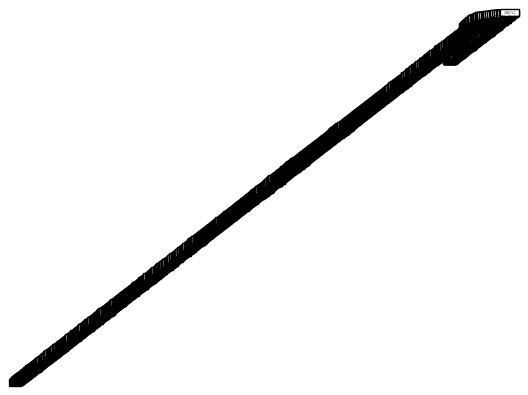

In [ ]:
# plt.figure(figsize=(4000,2000))  # customize according to the size of your tree
# _ = tree.plot_tree(model, feature_names = X.columns)
tree.plot_tree(model)

In [ ]:
predictions = model.predict(X_test_counts)
score = accuracy_score(y_test,predictions)
score

0.6489630753667173